In [1]:
from bias import Bias
from qe import QE
import numpy as np
import matplotlib.pyplot as plt
from cosmology import Cosmology
from noise import Noise
import time

plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('figure', facecolor='w')

In [2]:
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
_bias = Bias(N0_file, M_path="cache/_M")
_qe = QE()

Matrix([[TT, TE, TB], [ET, EE, EB], [BT, BE, BB]])
Matrix([[TT, TE, TB], [ET, EE, EB], [BT, BE, BB]])


In [3]:
_cosmo = Cosmology()
_noise = Noise()

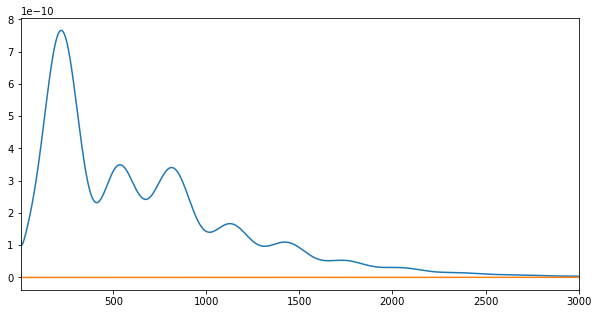

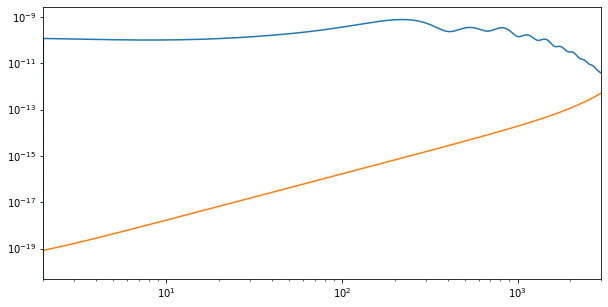

In [4]:
Cl_TT = _cosmo.get_lens_ps("TT", 6000)
Ls_C = np.arange(np.size(Cl_TT))
N_TT = _noise.get_cmb_gaussian_N("TT")
Ls_N = np.arange(np.size(N_TT))
plt.plot(Ls_C, (Ls_C*Ls_C+1)*Cl_TT/(2*np.pi))
plt.plot(Ls_N, (Ls_N*Ls_N+1)*N_TT/(2*np.pi))
plt.xlim(2, 3000)

plt.figure()
plt.loglog(Ls_C, (Ls_C*Ls_C+1)*Cl_TT/(2*np.pi))
plt.loglog(Ls_N, (Ls_N*Ls_N+1)*N_TT/(2*np.pi))
plt.xlim(2, 3000)
plt.show()

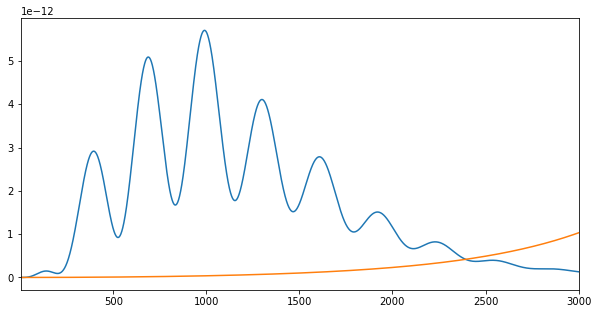

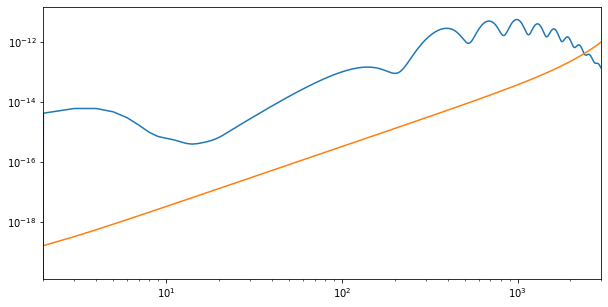

In [5]:
Cl_TT = _cosmo.get_lens_ps("EE", 6000)
Ls_C = np.arange(np.size(Cl_TT))
N_TT = _noise.get_cmb_gaussian_N("EE")
Ls_N = np.arange(np.size(N_TT))
plt.plot(Ls_C, (Ls_C*Ls_C+1)*Cl_TT/(2*np.pi))
plt.plot(Ls_N, (Ls_N*Ls_N+1)*N_TT/(2*np.pi))
plt.xlim(2, 3000)

plt.figure()
plt.loglog(Ls_C, (Ls_C*Ls_C+1)*Cl_TT/(2*np.pi))
plt.loglog(Ls_N, (Ls_N*Ls_N+1)*N_TT/(2*np.pi))
plt.xlim(2, 3000)
plt.show()

Time = 0.7553999423980713


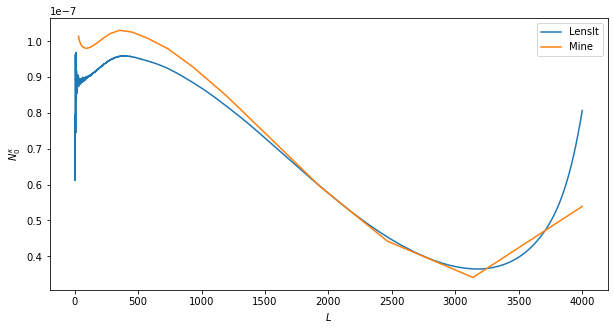

In [12]:
N0_file = "cache/_N0/N0_my_SO_14_14_T.npy"
_noise.setup_cmb_noise(N0_file, 0)

ellmax=4000
N0_kappa = _noise.get_N0("curl", ellmax, tidy=True, ell_factors=True)
ells = np.arange(ellmax + 1)
plt.plot(ells[2:], N0_kappa[2:], label="LensIt")
samp1 = np.arange(30, 40, 2)
samp2 = np.logspace(1, 3, 20) * 4
ells = np.concatenate((samp1, samp2))
t0=time.time()
# N_exp = (ells * (ells + 1))**2 /np.abs( _qe.normalisation("TT", ells, dL=2, Ntheta=100, curl=False)) / 4
N = (ells * (ells + 1))**2 /np.abs( _qe.normalisation("TT", ells, dL=2, Ntheta=100, curl=True)) / 4
# plt.plot(ells, N_exp, label="Mine: explicit")
plt.plot(ells, N, label="Mine")
t1 = time.time()
print(f"Time = {t1 - t0}")
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")
plt.legend()
plt.show()

Time = 11.44327187538147


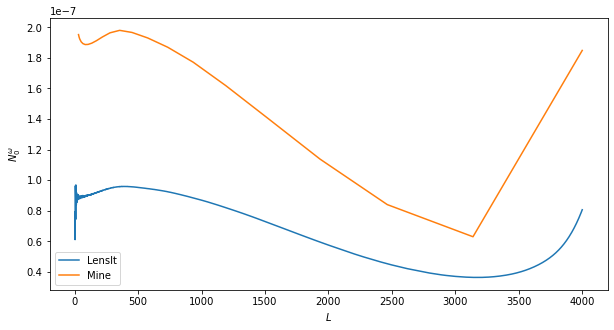

In [13]:
ellmax=4000
N0_kappa = _noise.get_N0("curl", ellmax, tidy=True, ell_factors=True)
ells = np.arange(ellmax + 1)
plt.plot(ells[2:], N0_kappa[2:], label="LensIt")
samp1 = np.arange(30, 40, 2)
samp2 = np.logspace(1, 3, 20) * 4
ells = np.concatenate((samp1, samp2))
t0=time.time()
# N_exp = (ells * (ells + 1))**2 /np.abs( _qe.gmv_normalisation(ells, dL=2, Ntheta=100, curl=True, explicit=True)) / 4
N = (ells * (ells + 1))**2 /np.abs( _qe.normalisation_vector("TT",ells, dL=2, Ntheta=100, curl=True)) / 4
# plt.plot(ells, N_exp, label="Mine: explicit")
plt.plot(ells, N, label="Mine")
t1 = time.time()
print(f"Time = {t1 - t0}")
plt.xlabel("$L$")
plt.ylabel("$N_0^{\omega}$")
# plt.ylim(0, 8e-8)
plt.legend()
plt.show()